In [2]:
pip install tensorflow-hub

     |████████████████████████████████| 85 kB 2.7 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


Import Statements

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

#For Blob
from azure.storage.blob import BlobServiceClient, ContainerClient

2024-01-22 09:20:24.163903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 09:20:27.130527: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 09:20:28.035538: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-22 09:20:28.035576: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Loading the Faster R-CNN Model

In [2]:
# Load a pre-trained Faster R-CNN model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1"
model = hub.load(model_url)

2024-01-22 09:21:06.733201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-22 09:21:06.733267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (myinstance1): /proc/driver/nvidia/version does not exist
2024-01-22 09:21:06.743372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Performing the data loading operation from Azure Blob Storage

In [13]:
#Loading the data from Azure Blob Storage

#Add the Azure Blob Storage Details if required

blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

container_client = blob_service_client.get_container_client(container_name)
blobs = container_client.list_blobs()
blob_contents = {}

blobs = container_client.list_blobs()

blob_name = "UI/2024-01-14_041440_UTC/ThinkEvolve Project Dataset/8702.jpg"
blob_client = container_client.get_blob_client(blob_name)
blob_data = blob_client.download_blob()
content = blob_data.readall()
print(type(content))

<class 'bytes'>


In [14]:
img_array = cv2.imdecode(np.frombuffer(content, np.uint8), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
w

Predicting the results using pre-trained model

In [15]:
results = model(img_input)

In [16]:
boxes = results["detection_boxes"].numpy()
scores = results["detection_scores"].numpy()
labels = results["detection_classes"].numpy().astype(int)

In [17]:
for box, score, label in zip(boxes, scores, labels):
    for b, s, l in zip(box, score, label):
        if s > 0.5:
            ymin, xmin, ymax, xmax = b
            xmin = int(xmin * img_array.shape[1])
            xmax = int(xmax * img_array.shape[1])
            ymin = int(ymin * img_array.shape[0])
            ymax = int(ymax * img_array.shape[0])

            # Bounding Box on the image
            cv2.rectangle(img_array, (xmin, ymin), (xmax, ymax), (0, 0, 255), 5)

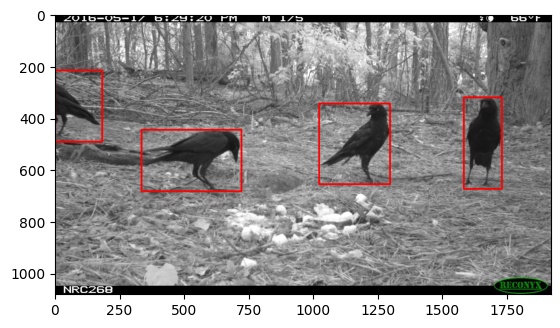

In [18]:
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# plt.axis("off")
plt.show()

In [45]:
blob_name1 = "UI/2024-01-14_041440_UTC/ThinkEvolve Project Dataset/8808.jpg"
blob_client = container_client.get_blob_client(blob_name1)
blob_data1 = blob_client.download_blob()
content1 = blob_data1.readall()

In [51]:
img_array = cv2.imdecode(np.frombuffer(content1, np.uint8), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_input = np.expand_dims(img_rgb, axis=0)

In [52]:
results = model(img_input)

In [53]:
boxes = results["detection_boxes"].numpy()
scores = results["detection_scores"].numpy()
labels = results["detection_classes"].numpy().astype(int)

In [54]:
for box, score, label in zip(boxes, scores, labels):
    for b, s, l in zip(box, score, label):
        if s > 0.5:
            ymin, xmin, ymax, xmax = b
            xmin = int(xmin * img_array.shape[1])
            xmax = int(xmax * img_array.shape[1])
            ymin = int(ymin * img_array.shape[0])
            ymax = int(ymax * img_array.shape[0])

            # Bounding Box on the image
            cv2.rectangle(img_array, (xmin, ymin), (xmax, ymax), (0, 0, 255), 5)

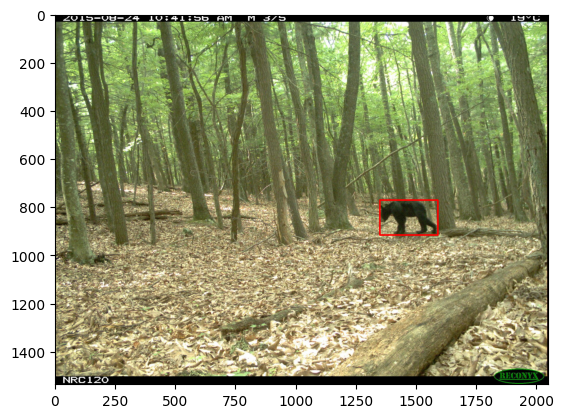

In [55]:
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# plt.axis("off")
plt.show()

In [68]:
blob_name2 = "UI/2024-01-14_041440_UTC/ThinkEvolve Project Dataset/1886.jpg"
blob_client = container_client.get_blob_client(blob_name2)
blob_data2 = blob_client.download_blob()
content2 = blob_data2.readall()

In [69]:
img_array = cv2.imdecode(np.frombuffer(content2, np.uint8), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_input = np.expand_dims(img_rgb, axis=0)

In [70]:
results = model(img_input)

In [71]:
boxes = results["detection_boxes"].numpy()
scores = results["detection_scores"].numpy()
labels = results["detection_classes"].numpy().astype(int)

In [74]:
for box, score, label in zip(boxes, scores, labels):
    for b, s, l in zip(box, score, label):
        if s > 0.5:
            ymin, xmin, ymax, xmax = b
            xmin = int(xmin * img_array.shape[1])
            xmax = int(xmax * img_array.shape[1])
            ymin = int(ymin * img_array.shape[0])
            ymax = int(ymax * img_array.shape[0])

            # Bounding Box on the image
            cv2.rectangle(img_array, (xmin, ymin), (xmax, ymax), (0, 0, 255), 5)

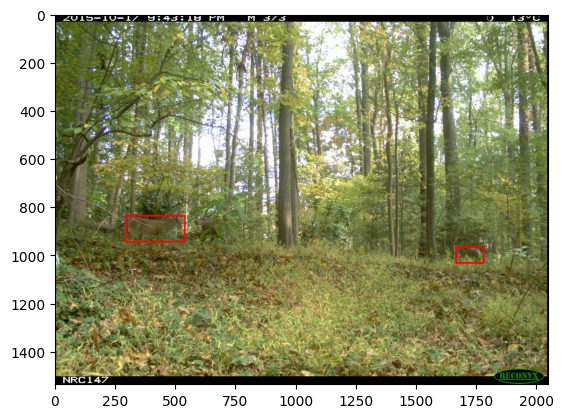

In [75]:
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# plt.axis("off")
plt.show()